打印文件头

In [9]:
from pathlib import Path
import csv
path = Path('weather_data/sitka_weather_07-2021_simple.csv')
lines = path.read_text().splitlines()
reader = csv.reader(lines)#创建一个 reader 对象，用于解析文件的各行
header_row = next(reader)
print(header_row)

['STATION', 'NAME', 'DATE', 'TAVG', 'TMAX', 'TMIN']


打印文件头及其位置

In [19]:
reader = csv.reader(lines)
header_row = next(reader)
for index, column_header in enumerate(header_row):#用 enumerate() 来获取每个元素的索引及其值
    print(index, column_header)

0 STATION
1 NAME
2 DATE
3 TAVG
4 TMAX
5 TMIN


读取每日最高温度

In [11]:
from pathlib import Path
import csv
reader = csv.reader(lines)
header_row = next(reader)
# 提取最高温度
highs = []
for row in reader:
    high = int(row[4])
    highs.append(high)
print(highs)

[61, 60, 66, 60, 65, 59, 58, 58, 57, 60, 60, 60, 57, 58, 60, 61, 63, 63, 70, 64, 59, 63, 61, 58, 59, 64, 62, 70, 70, 73, 66]


绘制温度图（使用Matplotlib）

C:\Users\lenovo\AppData\Local\Temp\ipykernel_25260\1419442213.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


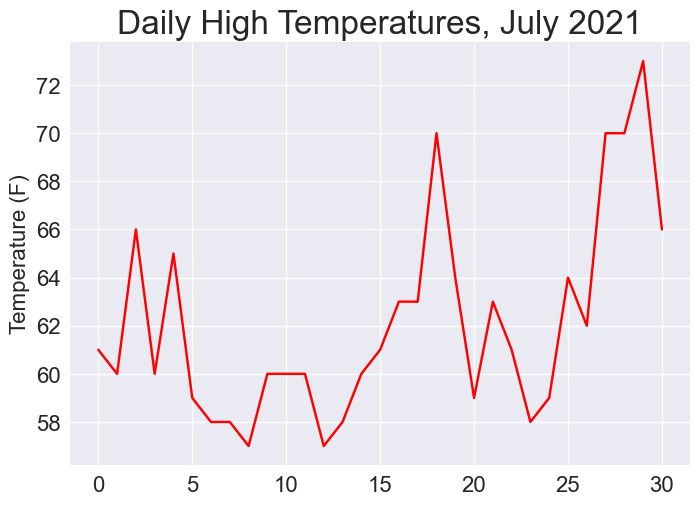

In [13]:
from pathlib import Path
import csv
import matplotlib.pyplot as plt
path = Path('weather_data/sitka_weather_07-2021_simple.csv')
lines = path.read_text().splitlines()

# 根据最高温度绘图
plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.plot(highs, color='red')
# 设置绘图的格式
ax.set_title("Daily High Temperatures, July 2021", fontsize=24)
ax.set_xlabel('', fontsize=16)#鉴于还没有添加日期，这里没有给 x 轴添加标签
ax.set_ylabel("Temperature (F)", fontsize=16)
ax.tick_params(labelsize=16)
plt.show()

datetime 模块

In [ ]:
在图中添加日期，使用 datetime 模块中的 strptime() 方法，将字符串 "2021-7-1" 转换为一个表示相应日期的对象

In [20]:
from datetime import datetime
first_date = datetime.strptime('2021-07-01', '%Y-%m-%d')#%Y，四位数的年份；%m，表示月份的两位数；%d，月份中的一天
print(first_date)

2021-07-01 00:00:00


In [ ]:
strptime() 方法的第二个实参可接受各种以 % 打头的参数，并根据它们来决定如何解读日期，可见p411实参图

C:\Users\lenovo\AppData\Local\Temp\ipykernel_25260\1491142315.py:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


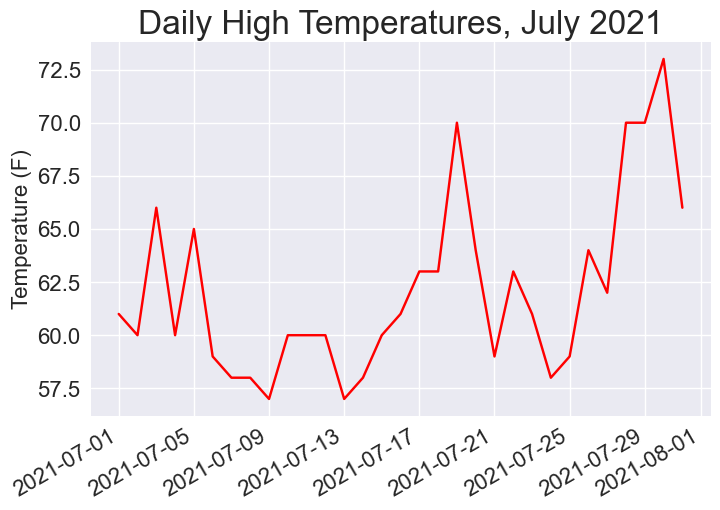

In [25]:
from pathlib import Path
from datetime import datetime
import csv
import matplotlib.pyplot as plt
path = Path('weather_data/sitka_weather_07-2021_simple.csv')
lines = path.read_text().splitlines()
reader = csv.reader(lines)
header_row = next(reader)

# 提取日期和最高温度绘图

dates, highs = [], []#创建了两个空列表，用于存储从文件中提取的日期和最高温度
for row in reader:
    current_date = datetime.strptime(row[2], '%Y/%m/%d')
    high = int(row[4])
    dates.append(current_date)
    highs.append(high)
#绘图
plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.plot(dates,highs,color='red')
# 设置绘图的格式
ax.set_title("Daily High Temperatures, July 2021", fontsize=24)
ax.set_xlabel('', fontsize=16)
fig.autofmt_xdate()#) 来绘制倾斜的日期标签，以免它们彼此重叠
ax.set_ylabel("Temperature (F)", fontsize=16)
ax.tick_params(labelsize=16)
plt.show()

涵盖更长的时间,创建整年的天气图

C:\Users\lenovo\AppData\Local\Temp\ipykernel_25260\809790138.py:20: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


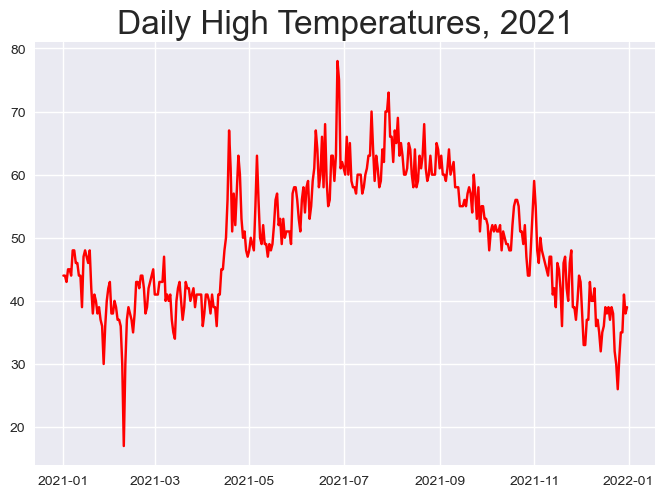

In [27]:
from pathlib import Path
from datetime import datetime
import csv
import matplotlib.pyplot as plt
path = Path('weather_data/sitka_weather_2021_simple.csv')
lines = path.read_text().splitlines()

reader = csv.reader(lines)
header_row = next(reader)

# 提取日期和最高温度绘图

dates, highs = [], []#创建了两个空列表，用于存储从文件中提取的日期和最高温度
for row in reader:
    current_date = datetime.strptime(row[2], '%Y-%m-%d')
    high = int(row[4])
    dates.append(current_date)
    highs.append(high)
#绘图
plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.plot(dates,highs,color='red')
# 设置绘图的格式
ax.set_title("Daily High Temperatures, 2021", fontsize=24)
ax.set_xlabel('', fontsize=16)
plt.show()

添加最低温度数据

C:\Users\lenovo\AppData\Local\Temp\ipykernel_25260\3877848277.py:20: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


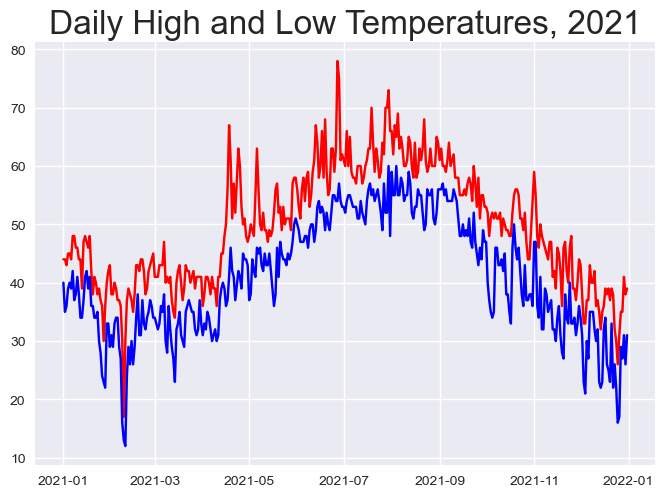

In [28]:
from pathlib import Path
from datetime import datetime
import csv
import matplotlib.pyplot as plt
path = Path('weather_data/sitka_weather_2021_simple.csv')
lines = path.read_text().splitlines()

reader = csv.reader(lines)
header_row = next(reader)
# 提取日期、最高温度和最低温度
dates, highs, lows = [], [], []
for row in reader:
    current_date = datetime.strptime(row[2], '%Y-%m-%d')
    high = int(row[4])
    low = int(row[5])
    dates.append(current_date)
    highs.append(high)
    lows.append(low)
# 根据数据绘图
plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.plot(dates, highs, color='red')
ax.plot(dates, lows, color='blue')
# 设置绘图的格式
ax.set_title("Daily High and Low Temperatures, 2021", fontsize=24)
ax.set_xlabel('', fontsize=16)
plt.show()

In [ ]:
import pandas 

In [ ]:
import seaborn as sns
sns.lineplot(x=)

In [18]:
from datetime import datetime
datetime.fromtimestamp(1718336457) #位数  # 时间的准换 时间戳  Python 里的时间和unix时间，从1970开始算

datetime.datetime(2024, 6, 14, 11, 40, 57)

## 书上作业

C:\Users\lenovo\AppData\Local\Temp\ipykernel_25260\2678200400.py:21: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


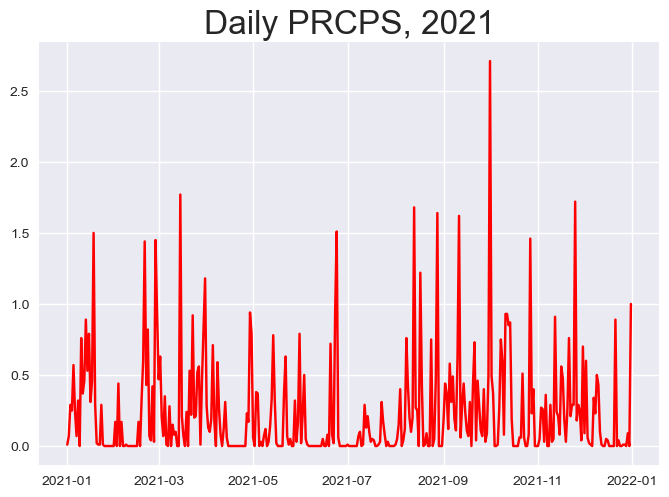

In [40]:
#16.1
from pathlib import Path
from datetime import datetime
import csv
import matplotlib.pyplot as plt

path = Path('weather_data/sitka_weather_2021_full.csv')
lines = path.read_text().splitlines()

reader = csv.reader(lines)
header_row = next(reader)

# 提取日期和每日降水量

dates, prcps = [], []#创建了两个空列表，用于存储从文件中提取的日期和降水量
for row in reader:
    current_date = datetime.strptime(row[2], '%Y-%m-%d')
    prcp = float(row[5])#小数点，所以用float，浮点！!!
    dates.append(current_date)
    prcps.append(prcp)
#绘图
plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.plot(dates,prcps,color='red')
# 设置绘图的格式
ax.set_title("Daily PRCPS, 2021", fontsize=24)
ax.set_xlabel('', fontsize=16)

plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_33572\1737474725.py:22: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


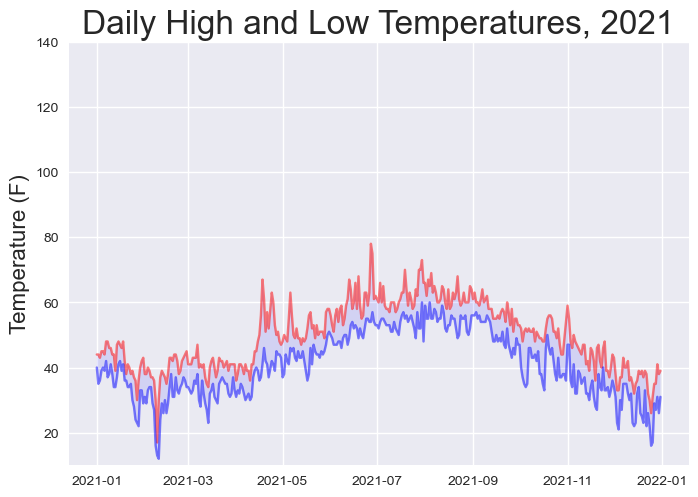

In [3]:
#16.2
#锡特卡
from pathlib import Path
from datetime import datetime
import csv
import matplotlib.pyplot as plt
path = Path('weather_data/sitka_weather_2021_simple.csv')
lines = path.read_text().splitlines()

reader = csv.reader(lines)
header_row = next(reader)
# 提取日期、最高温度和最低温度
dates, highs, lows = [], [], []
for row in reader:
    current_date = datetime.strptime(row[2], '%Y-%m-%d')
    high = int(row[4])
    low = int(row[5])
    dates.append(current_date)
    highs.append(high)
    lows.append(low)
# 根据数据绘图
plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.plot(dates, highs, color='red', alpha=0.5)
ax.plot(dates, lows, color='blue', alpha=0.5)
ax.fill_between(dates, highs, lows, facecolor='blue', alpha=0.1)
# 设置绘图的格式
ax.set_title("Daily High and Low Temperatures, 2021", fontsize=24)
ax.set_xlabel('', fontsize=16)
ax.set_ylabel("Temperature (F)", fontsize=16)
ax.set_ylim(10, 140)#让刻度范围一致
plt.show()





In [9]:
#死亡谷

from pathlib import Path
from datetime import datetime
import csv
import matplotlib.pyplot as plt

path = Path('weather_data/death_valley_2021_simple.csv')
lines = path.read_text().splitlines()
reader = csv.reader(lines)
header_row = next(reader)

# 提取日期、最高温度和最低温度
dates, highs, lows = [], [], []
for row in reader:
    current_date = datetime.strptime(row[2], '%Y-%m-%d')
    high = int(row[3])
    low = int(row[4])
    dates.append(current_date)
    highs.append(high)
    lows.append(low)
# 根据数据绘图
plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.plot(dates, highs, color='red',alpha=0.5)
ax.plot(dates, lows, color='blue',alpha=0.5)
ax.fill_between(dates, highs, lows, facecolor='blue', alpha=0.1)

# 设置绘图的格式
ax.set_title("Daily High and Low Temperatures, 2021", fontsize=24)
ax.set_xlabel('', fontsize=16)
ax.set_ylabel("Temperature (F)", fontsize=16)
ax.set_ylim(10, 140)
plt.show()

ValueError: invalid literal for int() with base 10: ''

Missing data for 2021-05-04 00:00:00


C:\Users\lenovo\AppData\Local\Temp\ipykernel_33572\474455299.py:27: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


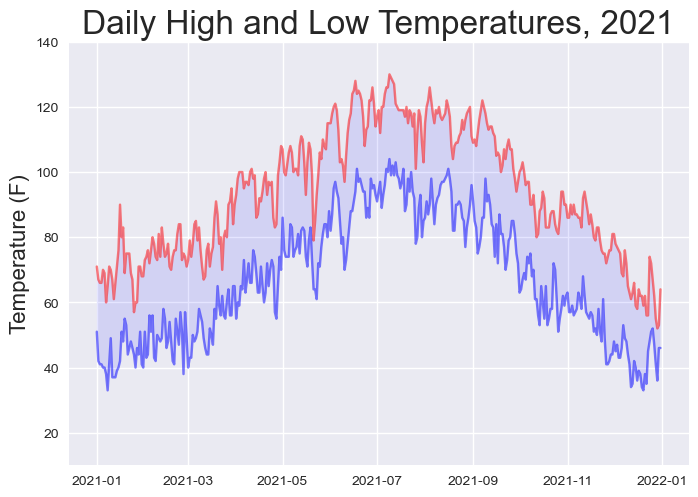

In [13]:
#16.2
#锡特卡
from pathlib import Path
from datetime import datetime
import csv
import matplotlib.pyplot as plt
path = Path('weather_data/death_valley_2021_simple.csv')
lines = path.read_text().splitlines()

reader = csv.reader(lines)
header_row = next(reader)
# 提取日期、最高温度和最低温度
dates, highs, lows = [], [], []
for row in reader:
    
    current_date = datetime.strptime(row[2], '%Y-%m-%d')
    try:
        high = int(row[3])
        low = int(row[4])
    except ValueError:
        print(f"Missing data for {current_date}")
    else:
        dates.append(current_date)
        highs.append(high)
        lows.append(low)
# 根据数据绘图
plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.plot(dates, highs, color='red', alpha=0.5)
ax.plot(dates, lows, color='blue', alpha=0.5)
ax.fill_between(dates, highs, lows, facecolor='blue', alpha=0.1)
# 设置绘图的格式
ax.set_title("Daily High and Low Temperatures, 2021", fontsize=24)
ax.set_xlabel('', fontsize=16)
ax.set_ylabel("Temperature (F)", fontsize=16)
ax.set_ylim(10, 140)#让刻度范围一致
plt.show()



Missing data for 2021-05-04 00:00:00


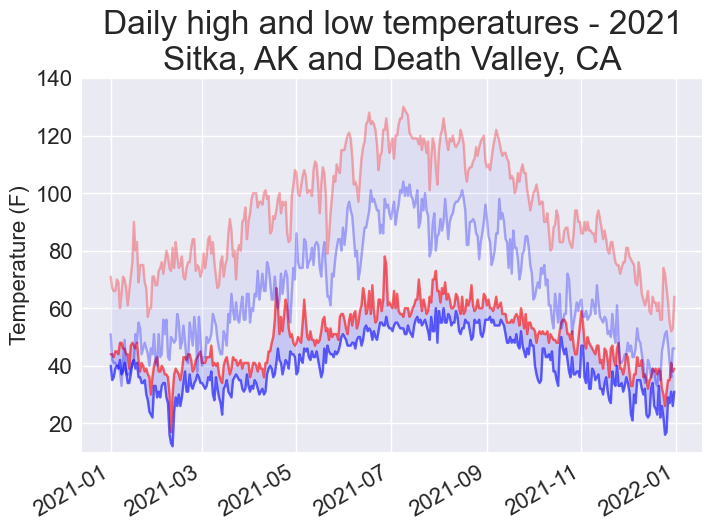

In [18]:
#16.2
def get_weather_data(path, dates, highs, lows, date_index, high_index,low_index):
    """从数据文件中获取最高温度和最低温度"""
    lines = path.read_text().splitlines()
    reader = csv.reader(lines)
    header_row = next(reader)
# 提取日期、最高温度和最低温度
    for row in reader:
        current_date = datetime.strptime(row[date_index], '%Y-%m-%d')
        try:
            high = int(row[high_index])
            low = int(row[low_index])
        except ValueError:
            print(f"Missing data for {current_date}")
        else:
            dates.append(current_date)
            highs.append(high)
            lows.append(low)
        
# 获取锡特卡的温度数据
path = Path('weather_data/sitka_weather_2021_simple.csv')
dates, highs, lows = [], [], []
get_weather_data(path, dates, highs, lows, date_index=2, high_index=4,
low_index=5)
# 根据锡特卡的数据绘图
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots()
ax.plot(dates, highs, color='red', alpha=0.6)
ax.plot(dates, lows, color='blue', alpha=0.6)
ax.fill_between(dates, highs, lows, facecolor='blue', alpha=0.15)

# 获取死亡谷的数据
path = Path('weather_data/death_valley_2021_simple.csv')
dates, highs, lows = [], [], []
get_weather_data(path, dates, highs, lows, date_index=2, high_index=3,low_index=4)
# 将死亡谷的数据添加到当前绘图中
ax.plot(dates, highs, color='red', alpha=0.3)
ax.plot(dates, lows, color='blue', alpha=0.3)
ax.fill_between(dates, highs, lows, facecolor='blue', alpha=0.05)
# 设置绘图的格式
title = "Daily high and low temperatures - 2021"
title += "\nSitka, AK and Death Valley, CA"
ax.set_title(title, fontsize=24)
ax.set_xlabel('', fontsize=16)
fig.autofmt_xdate()
ax.set_ylabel("Temperature (F)", fontsize=16)
ax.tick_params(labelsize=16)
ax.set_ylim(10, 140)

plt.show()

In [ ]:
#16.4 （不太懂怎么写？）